# **Effect of regularization in regression**

In [260]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Helper function
def draw_line(a,b,c,mi,ma):
  points=np.array([[((b*mi - c)/a), mi],[((b*ma - c)/a), ma]])
  return points[:,0], points[:,1]

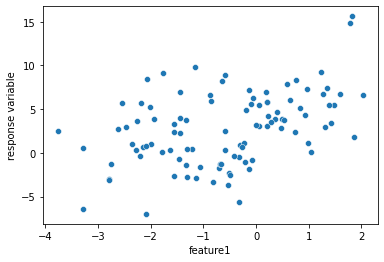

In [261]:
bias = 2
X, y, coef = make_regression(n_samples=100, n_features=1, n_informative=1, noise=3, coef=True, bias=bias, random_state=34)
## Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_test[:,0] = X_test[:,0]-2

X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
plt.xlabel("feature1")
plt.ylabel("response variable")
sns.scatterplot(x=X[:,0], y=y)
plt.show()

In [262]:
## Regression without regularization 
reg1 = SGDRegressor(loss='squared_loss',alpha=0) ## set 'alpha=0' to nullify the regularization
reg1.fit(X_train,y_train)
y_pred_train_reg1 = reg1.predict(X_train)
y_pred_test_reg1 = reg1.predict(X_test)

## Regression with regularization 
## pick the valid 'alpha' by doing Cross Validation on cv/test dataset, but here picking it randomly
reg2 = SGDRegressor(loss='squared_loss',alpha=3.0) 
reg2.fit(X_train,y_train)
y_pred_train_reg2 = reg2.predict(X_train)
y_pred_test_reg2 = reg2.predict(X_test)

print(f"** without regularization **\n Train error: {mean_squared_error(y_train, y_pred_train_reg1)} \n Test error: {mean_squared_error(y_test, y_pred_test_reg1)}\n")
print(f"** with regularization **\n Train error: {mean_squared_error(y_train, y_pred_train_reg2)} \n Test error: {mean_squared_error(y_test, y_pred_test_reg2)}")

** without regularization **
 Train error: 9.55027989134933 
 Test error: 54.58375225050331

** with regularization **
 Train error: 14.904114788255042 
 Test error: 14.83957424794478


**Observations:**
* Test error of the regressor without regularization (reg1) is very much large compared to the Train error.
* This is the sign of overfitting, i.e the regressor is able to fit to the Train data very well but failed to do in case of Test data.

* On the otherhand, regressor with regularization (reg2) is not performing good on the Trian data as reg1, but has a much better(lower) loss on Test error as compared to the Test error of reg1.

* So, reg2 is said to have better predictions in future as compared to reg1.

* Hence, regulerization is must to achive the better model performance on the future datapoints.

---------------------------------------
**Visulizing the decision surfaces for both with and withot regularization.**

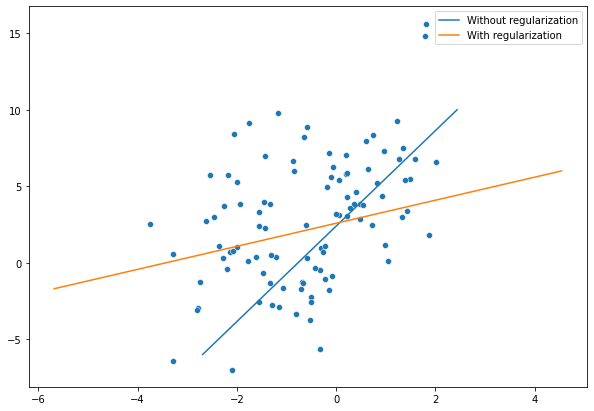

In [263]:
line_x1, line_y1 = draw_line(reg1.coef_[0],1,reg1.intercept_[0],-6,10)
line_x2, line_y2 = draw_line(reg2.coef_[0],1,reg2.intercept_[0],-1.7,6)

plt.figure(figsize=(10,7))
sns.lineplot(x=line_x1, y=line_y1, label="Without regularization")
sns.lineplot(x=line_x2, y=line_y2, label="With regularization")
sns.scatterplot(x=X[:,0], y=y)
plt.show()

* Look at the blue line (reg1), it is alligned on the train data only ignoring the entire test data, but on the otherhand the orange line is trying to cover both the train and test datasets  